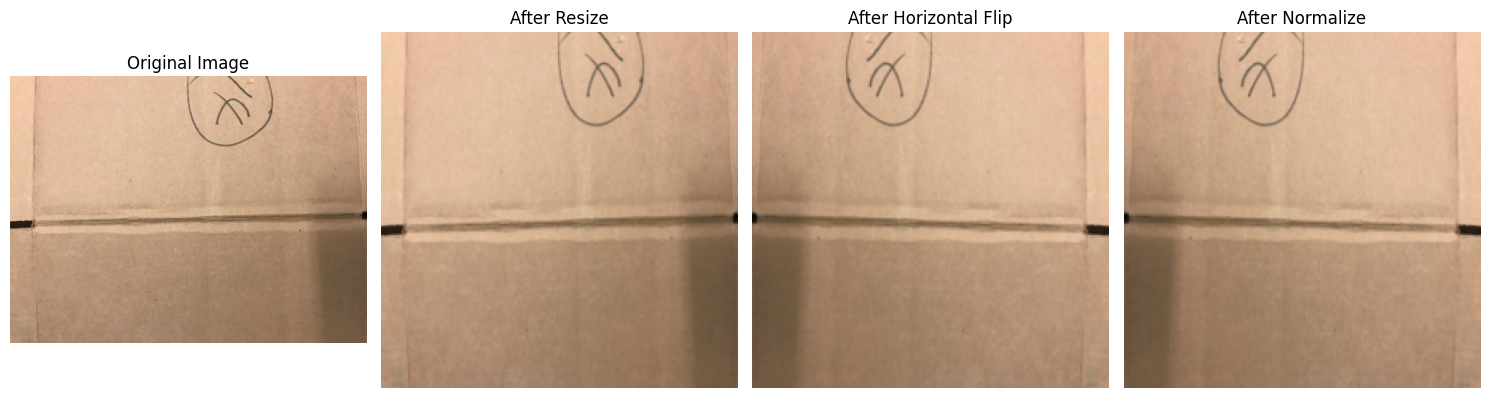

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms.functional as F
from torchvision import datasets
import torch

# load the original image
raw_dataset = datasets.ImageFolder(root="../datasets/trashnet")
img_path, label = raw_dataset.samples[0]
img = Image.open(img_path).convert('RGB')

# show original image
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# Resize
resized = F.resize(img, (224, 224))
plt.subplot(1, 4, 2)
plt.imshow(resized)
plt.title("After Resize")
plt.axis('off')

# Random Horizontal Flip (manually apply to show effect)
flipped = F.hflip(resized)
plt.subplot(1, 4, 3)
plt.imshow(flipped)
plt.title("After Horizontal Flip")
plt.axis('off')

# ToTensor + Normalize
tensor = F.to_tensor(flipped)
normalized = F.normalize(tensor,
                         mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])

# show normalized image
def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).reshape(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).reshape(3, 1, 1)
    return tensor * std + mean

img_denorm = denormalize(normalized).permute(1, 2, 0).numpy()
img_denorm = np.clip(img_denorm, 0, 1)

plt.subplot(1, 4, 4)
plt.imshow(img_denorm)
plt.title("After Normalize")
plt.axis('off')

plt.tight_layout()
plt.show()